# Stability

## The AWS example

On the AWS-course, module 4, section 2, part 2 it is said that two random list of numbers won't have a good correlation, but if they share a similar slope they will. Lets experiment.

In [2]:
import random
import numpy

random.seed(5)

l1 = [random.randint(1, 10) for i in range(100)]
l2 = [random.randint(1, 10) for i in range(100)]

numpy.corrcoef(l1, l2)

array([[1.        , 0.01396125],
       [0.01396125, 1.        ]])

What doe the series look like in a graph?

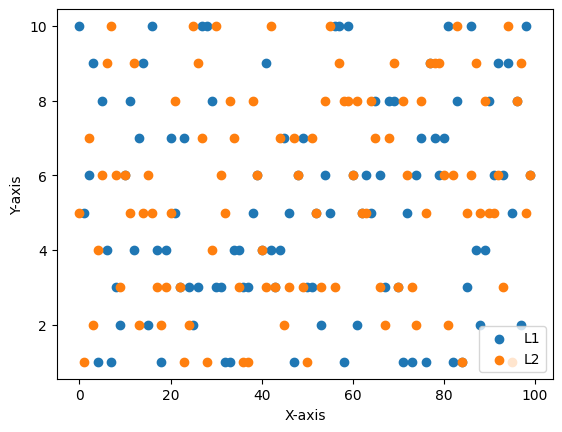

In [3]:
import matplotlib.pyplot as plt

plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.scatter(y = l1, x=range(100))
plt.scatter(y = l2, x=range(100))

plt.legend(["L1", "L2"])
plt.show()

A correlation of 1.3% is low indeed. But what if whe introduce a slope of 10%?

In [4]:
l1 = [(i/10) + random.randint(1, 10) for i in range(100)]
l2 = [(i/10) + random.randint(1, 10) for i in range(100)]

numpy.corrcoef(l1, l2)

array([[1.       , 0.4482311],
       [0.4482311, 1.       ]])

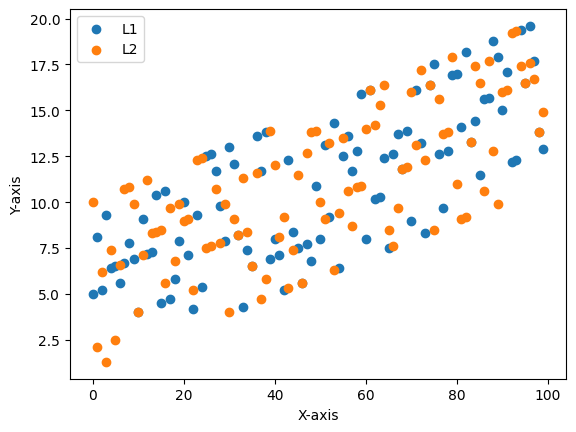

In [5]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.scatter(y = l1, x=range(100))
plt.scatter(y = l2, x=range(100))

plt.legend(["L1", "L2"])
plt.show()

Perhaps a smaller slope of 1%?

[[1.         0.12597042]
 [0.12597042 1.        ]]


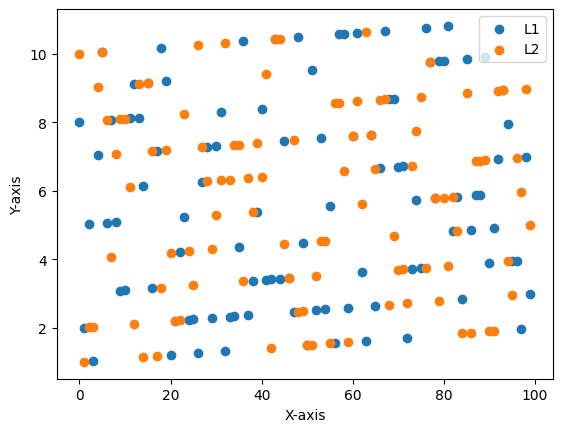

In [6]:
l1 = [(i/100) + random.randint(1, 10) for i in range(100)]
l2 = [(i/100) + random.randint(1, 10) for i in range(100)]

print(numpy.corrcoef(l1, l2))

plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.scatter(y = l1, x=range(100))
plt.scatter(y = l2, x=range(100))

plt.legend(["L1", "L2"])
plt.show()

Much smaller, but still significant. What about a 100% slope?

[[1.         0.99117103]
 [0.99117103 1.        ]]


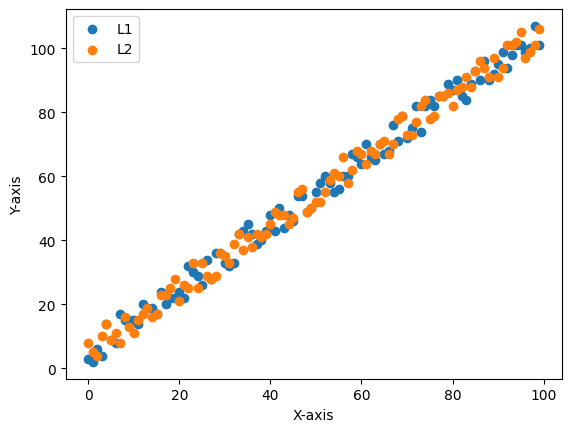

In [7]:
l1 = [(i) + random.randint(1, 10) for i in range(100)]
l2 = [(i) + random.randint(1, 10) for i in range(100)]

print(numpy.corrcoef(l1, l2))

plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.scatter(y = l1, x=range(100))
plt.scatter(y = l2, x=range(100))

plt.legend(["L1", "L2"])
plt.show()

Correlation is nearly 1. Could we graph this out?

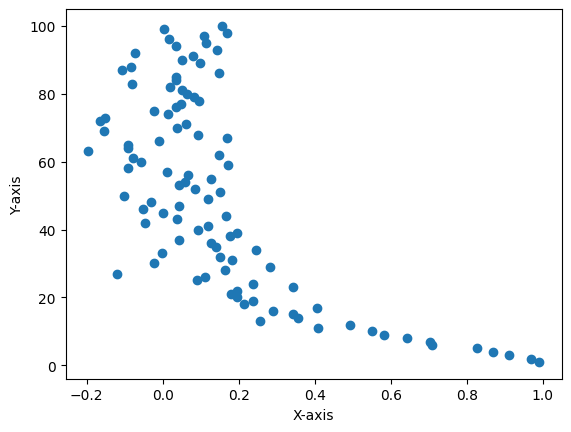

In [8]:
data_j = []
data_corr = []

for j in range(1,101):
    l1 = [(i/j) + random.randint(1, 10) for i in range(100)]
    l2 = [(i/j) + random.randint(1, 10) for i in range(100)]

    data_j.append(j)
    data_corr.append(numpy.corrcoef(l1, l2)[0][1])
    
# print(data)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.scatter(y = data_j, x=data_corr)


plt.show()
    

What we see is that:

* At low levels of J, so the high slope-value, the correlation is really good.
* As J gets above 20, so a slope 5% of the correlation becomes quite low.
* Sometimes, starting of a slope of about 1/40 (2.5%) the correlation is even negative, meaning the random data completely counteracted the slope we introduced.

## The random youtuber explaining Stationarity

[This one](https://www.youtube.com/watch?v=wNfXI81pSsM)

We are using the following data series:

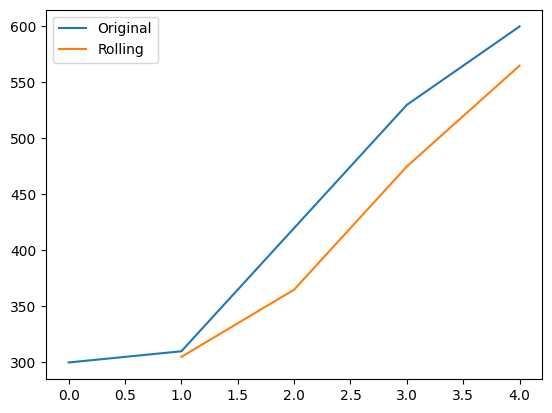

In [13]:
import pandas as pd

df = pd.DataFrame([300, 310, 420, 530, 600], columns = ['values'])
df_rolling = df.rolling(window=2).mean()

ax = df.plot()
df_rolling.plot(ax=ax)
ax.legend(["Original", "Rolling"])


Although what he is saying makes sense, the data does not. There's simply not enough data to show why smoothing is neccessary.

Let's look at [another random youtuber](https://www.youtube.com/watch?v=621MSxpYv60). He uses [this](https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis/) dataset.

<Axes: >

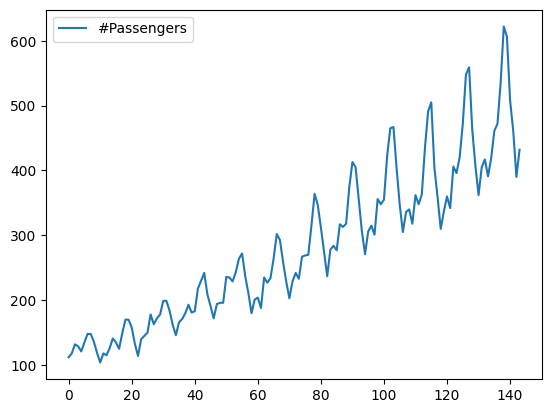

In [15]:
df_air = pd.read_csv("files/AirPassengers.csv")
df_air.plot()

What we see is that not only is the data going up, but the fluctuations are also increasing. This means it is not stationary because:

- There is a clear increasing trend
- There is a clear increasing variance

<Axes: >

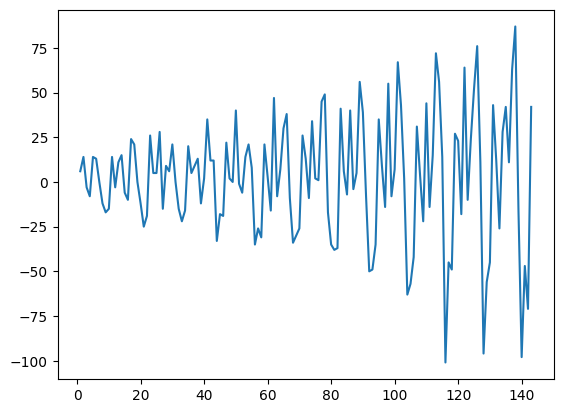

In [17]:
df_air["Passenger_Diff"] = df_air["#Passengers"].diff()
df_air["Passenger_Diff"].plot()

This completely removes the trend. That means the mean is now constant. The variance however is still unstable.

<Axes: >

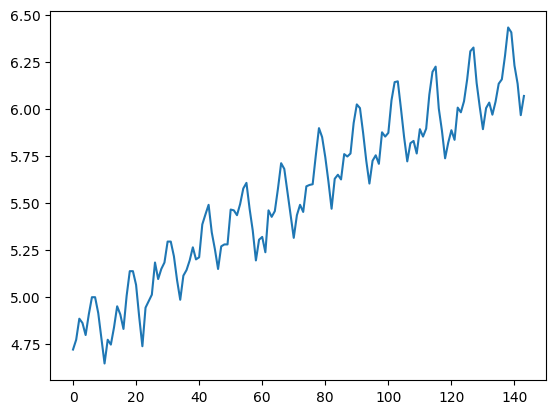

In [19]:
import numpy as np
df_air["Passenger_Log"] = np.log(df_air["#Passengers"])
df_air["Passenger_Log"].plot()

Now the trend is back, but the variance is constant. This means that the variance was actually exponential in our original dataset.

<Axes: >

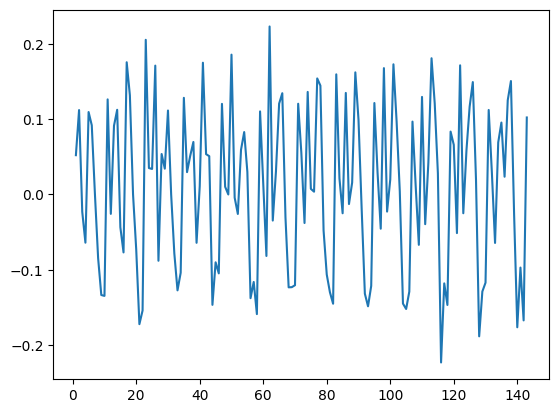

In [20]:
df_air["Passenger_Diff_Log"] = df_air["Passenger_Log"].diff()
df_air["Passenger_Diff_Log"].plot()

In the video a statistical test is now used to confirm that our data is stationary, but that would take us to far. The end of the video is though.

Why are we doing this? Aren't we deleting interesting information from the data?

No.

Because every data point has it's own mean and variance, it belongs to a different distribution. This was not the case when predicting non-time-series data, for example: when predicting ice cream sales as a function of temperature (warm: more ice creams sold) both the temperatures have a mean and the ice creams as well. These averages never change! When we look at ice cream sales as a function of time (ice cream sales going up from January until July) there is no common mean anymore, and therefore they don't have a common distribution.

The good news is that most models (like Arima) do this for us.